<a href="https://colab.research.google.com/github/notmylove/blogs/blob/master/%E2%80%9CExercise_3_Question_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plts


class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.966:
      print("\nReached 96.6% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = Callback()
# 导入数据
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 规范化数据
train_images, test_images = train_images/255.0, test_images/255.0
# 改变数据形状
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                            keras.layers.MaxPooling2D(2, 2),
                            keras.layers.Flatten(),
                            keras.layers.Dense(128, activation='relu'),
                            keras.layers.Dense(10, activation='softmax')])
# 为模型配置学习流程
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])
model.evaluate(test_iamges, test_labels)
predict_result = model.predict(test_images)





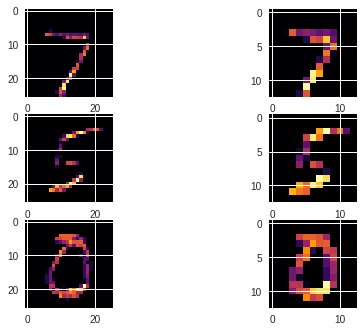

In [0]:

figure, ax = plt.subplots(3, 2)
layer_outputs = [layer.output for layer in model.layers]
first_image = 0
second_image = 23
third_image = 28
convolution_number = 1
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
for i in range(2):
  f1 = activation_model.predict(test_images[first_image].reshape(1, 28, 28, 1))[i]
  ax[0, i].imshow(f1[0, :, :, convolution_number], cmap='inferno')
  f2 = activation_model.predict(test_images[second_image].reshape(1, 28, 28, 1))[i]
  ax[1, i].imshow(f2[0, :, :, convolution_number], cmap='inferno')
  f3 = activation_model.predict(test_images[third_image].reshape(1, 28, 28, 1))[i]
  ax[2, i].imshow(f3[0, :, :, convolution_number], cmap='inferno')
